<a href="https://colab.research.google.com/github/aka-ish/Machine-Learning-Notes/blob/main/task_22_Pandas_Pivot_Table.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import re

pd.options.display.max_columns = None

### `Question-1:`

The dataset is based on NFTs. This is quite large. So, when you will read the dataset, you have to wait. The link of the dataset: https://tinyurl.com/2pfhncqw

Your task is to make a pivote table by using the columns "verification_status", "contract_type", "rarity_score" and "last_sale_price" to find out the total values.

### `Question-2:`

You are given a dataset about the cars' price and miles driven of different cars throughout the different years. The link of the dataset: https://tinyurl.com/2r24n45l. Your tasks are
- make a pivot table of the brands (the required brands are given below) from the "Year" 2018 to the year 2022 in which the "Price" is shown as average values and "Miles" are in median values. In this pivote table, every row represents a particular brand and each column represents either average "Price" of a partucular year or median values of "Miles" of a particular year.
- At the end plot a kde chart for the "Price" and "Miles" by using your pivot table.

There are some challenges to solve this task:
- There is no column that is represented to the brand name of the car. You have to find out on your own.
- Some values of "Years" column are misleading. You have to reset this column too that every value should tell a valid meaning.

In [2]:
# code here
car = pd.read_csv('/content/carvana - carvana.csv')

In [3]:
car.head()

,Name,Year,Miles,Price
0,Chevrolet Trax,2018,41946,16990
1,GMC Terrain,2020,45328,23990
2,Jeep Wrangler,2012,81068,21590
3,Jeep Renegade,2019,35372,21590
4,BMW X,20173,68992,22990


In [4]:
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22000 entries, 0 to 21999
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Name    22000 non-null  object
 1   Year    22000 non-null  int64 
 2   Miles   22000 non-null  int64 
 3   Price   22000 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 687.6+ KB


In [5]:
car['brands'] = car['Name'].str.split(" ").str.get(0)

In [6]:
car['Year'] = car['Year'].astype(str).str[:4].astype(int)

In [7]:
car['Year'].value_counts()

,count
Year,
2015,2858
2014,2512
2016,2478
2017,2456
2019,2421
2018,1914
2020,1379
2021,1352
2013,1322


In [8]:
pt = car.query('Year>=2018 and Year<=2022').pivot_table(index='brands',columns='Year',values=['Price','Miles'], aggfunc={'Price':'mean','Miles':'median'})

<Axes: ylabel='Density'>

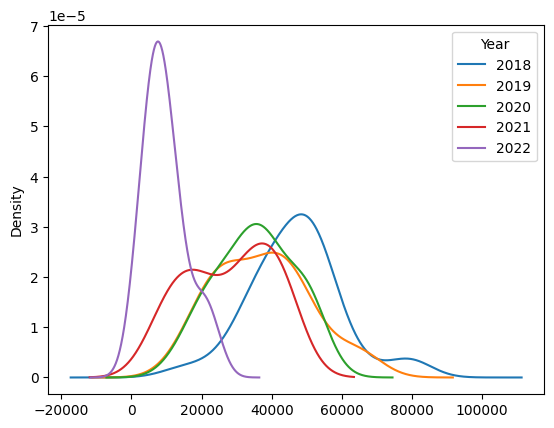

In [9]:
pt['Miles'].plot(kind='kde')

<Axes: ylabel='Density'>

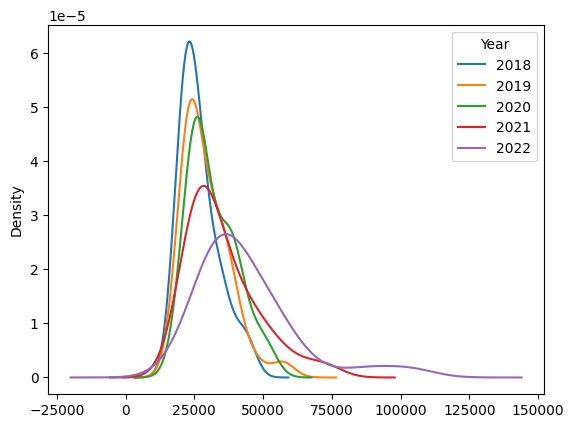

In [10]:
pt['Price'].plot(kind='kde')

### `Question-3:`

You are given a dataset of **Daily Power Generation in India** of regional wise of all Power Stations. Link of the dataset: https://tinyurl.com/2nq6kugt

Task
- In this dataset, there are many columns. Two of them are `Actual(MU)` and `Excess(+) / Shortfall (-)`. `Actual(MU)` represents the actual power generation. `Excess(+) / Shortfall (-)` tells is that generated power is excess or shortfall for that particular day of a power station. You have to find out what should be the actual power generation required for that day by the power stations that there would not be any excess or shorfall power. For the result, make a new column.
- Find out the month of the day and store it as a new column.
- Find out top 10 frequently appeared power stations in this dataframe.
- Next create a pivot table of which every row represents a power station and every column represents a month in a order. Like January, February, March...
- It is hard to get inside if you look through the only pivot table. So plot the pivot table.

In [11]:
power = pd.read_csv('/content/PowerGeneration - PowerGeneration.csv')

In [12]:
power

,Dates,Power Station,Monitored Cap.(MW),Total Cap. Under Maintenace (MW),Planned Maintanence (MW),Forced Maintanence(MW),Other Reasons (MW),Programme or Expected(MU),Actual(MU),Excess(+) / Shortfall (-),Deviation
0,2017-09-01,Delhi,2235.4,135.00,0.00,135.0,0,13,18,5.00,0.0
1,2017-09-01,Haryana,2720.0,2470.00,0.00,2470.0,0,28,7,-21.80,0.0
2,2017-09-01,Himachal Pradesh,3378.0,379.00,0.00,231.0,0,40,46,5.63,0.0
3,2017-09-01,Jammu and Kashmir,1285.0,150.00,0.00,0.0,0,14,23,9.43,0.0
4,2017-09-01,Punjab,3826.3,2697.65,77.65,2620.0,0,39,17,-21.69,0.0
...,...,...,...,...,...,...,...,...,...,...,...
345268,2022-04-13,Tripura,137.0,32.00,0.00,0.0,32,0,1,0.29,0.0
345269,2022-04-13,NEEPCO.,2027.0,963.50,313.50,650.0,0,0,12,-1.59,0.0
345270,2022-04-13,NHPC,105.0,35.00,0.00,35.0,0,0,0,-0.72,0.0
345271,2022-04-13,NTPC Ltd.,750.0,250.00,0.00,250.0,0,0,11,4.45,0.0


In [13]:
power['Date'] = pd.to_datetime(power['Dates'])

In [14]:
power['month'] = power['Date'].dt.month_name()

In [15]:
top_10 = power['Power Station'].value_counts(ascending=False).head(10)

In [16]:
power['power_required'] = power['Actual(MU)'] - power['Excess(+) / Shortfall (-)']
power.head()

,Dates,Power Station,Monitored Cap.(MW),Total Cap. Under Maintenace (MW),Planned Maintanence (MW),Forced Maintanence(MW),Other Reasons (MW),Programme or Expected(MU),Actual(MU),Excess(+) / Shortfall (-),Deviation,Date,month,power_required
0,2017-09-01,Delhi,2235.4,135.00,0.00,135.0,0,13,18,5.00,0.0,2017-09-01,September,13.00
1,2017-09-01,Haryana,2720.0,2470.00,0.00,2470.0,0,28,7,-21.80,0.0,2017-09-01,September,28.80
2,2017-09-01,Himachal Pradesh,3378.0,379.00,0.00,231.0,0,40,46,5.63,0.0,2017-09-01,September,40.37
3,2017-09-01,Jammu and Kashmir,1285.0,150.00,0.00,0.0,0,14,23,9.43,0.0,2017-09-01,September,13.57
4,2017-09-01,Punjab,3826.3,2697.65,77.65,2620.0,0,39,17,-21.69,0.0,2017-09-01,September,38.69


In [17]:
power.pivot_table(index='month',columns='Power Station',values='power_required',aggfunc='sum')

Power Station,0,ABAN POWR,ACB,ACPL,ADHPL,ADHUNIK,AEML,AHPC (GVK),AMNEPL,APCPL,APGPCL,APL,Andaman & Nicobar Islands,Andhra Pradesh,Andhra Pradesh.,Assam,BALCO,BBMB,BELLARY,BEPL,BIPL,BLAPPL,BRBCL,BSES AP,BSES(C),BSES(P),Bihar,CEPL,CESC,CGPL,CLPINDIA,CPL,Chhatisgarh,DAE,DBPCL,DEPL,DIL,DIPL,DLHP,DPSCLTD,DVC,Delhi,E.P.P.L.,EPGL,ESSAR,ESSARPMPL,GAUTAMI,GBHPPL,GCEL,GEPL,GIPCL,GIPL,GISL,GMR BHHPL,GMR ENERG,GPGSL (GVK),GREL,GVKP&IL,Gujarat,HBPCL,HEL,HMEL,HNPC,HSPCL,Haryana,Himachal Pradesh,IAEPL,IBPIL,ICCL,IEL,IEPL,ITPCL,JHAPL,JITPL,JPL,JPPVL,JSWBL,JSWEL,Jammu and Kashmir,JhPL(HR),Jharkhand,K.B.U.N.L,KONA,KONDAPALI,KWPCL,Karnataka,Kerala,L&T,LANCO,LAPPL,LBPL,LPGCL,LVS POWER,LVTPL,MADURAI P,MBPC,MBPMPL,MCCPL,MEL,MPCL,MPL,MUNPL,Madhya Pradesh,Maharashtra,Manipur,Meghalaya,NALCO,NDPL,NEEPCO.,NHDC,NHPC,NLC,NPCIL,NPGCL,NPGCPL,NPL,NSPCL,NTECL,NTPC Ltd.,NTPGPL,NTPL,NUPPL,ONGC,Odisha,PENNA,PGPL,PPGCL (Jaypee),PPNPGCL,PVUNL,Puducherry,Punjab,RATTANINDIA,REGL,RELIANCE,RGPPL,RIL (DAHANU),RKMPPL,RPSCL,RWPL (JSW),Rajasthan,SAMALPATI,SCPL,SEIL,SEL,SEPCPPL,SEPL,SGPL,SJVNL,SKPPPL,SKS,SMHPCL,SPGL,SPL,SPPL,ST-CMSECP,STPL,SVPPL,Sikkim,SrEPL,TATA MAH.,TATA PCL,THDC,TOR. POW. (SUGEN),TOR. POW. (UNOSUGEN),TPCIL,TPDDL,TRNE,TSPL,Tamil Nadu,Telangana,Tripura,UPCL,Uttar Pradesh,Uttarakhand,VASAVI,VEDANTA,VEMAGIRI,VESPL,VIP,VVL,WPCL,West Bengal
month,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
April,NaN,124.52,561.91,0.0,62.33,891.38,659.16,137.04,0.0,1814.00,170.00,19533.71,12.60,9091.17,2860.59,353.94,1020.20,1142.19,0.0,579.33,0.0,43.37,1419.13,0.0,0.0,0.00,-11.59,1429.64,1995.49,7862.90,15.51,0.0,6877.59,0.0,2515.62,-0.25,347.91,334.74,-3.69,NaN,13177.18,1790.10,7.47,1100.20,0.00,1454.16,0.0,18.73,1772.07,0.0,1137.44,124.99,3.00,80.10,3717.59,791.94,0.00,0.00,9960.47,1053.30,1473.35,131.41,1175.07,6.40,3536.65,1573.28,-10.79,0.0,16.62,NaN,66.00,2195.49,1091.17,1476.69,3894.65,3980.52,579.89,2944.53,1241.24,1751.28,749.64,916.00,0.0,270.29,0.00,12540.34,2462.24,12.48,1419.27,2675.89,0.0,3510.52,0.0,0.0,-6.3,6.17,2388.93,689.95,61.23,18.62,2209.30,1392.52,9387.12,22071.60,0.0,80.19,-24.43,0.0,1582.69,568.45,8383.42,6793.71,12896.85,1368.31,204.90,2631.96,1077.89,3036.72,88307.99,0.00,2060.70,126.30,1176.18,4200.16,74.16,0.00,2849.17,0.71,NaN,-7.23,2603.06,1853.40,524.51,0.0,1107.19,622.71,1407.57,2354.55,1630.18,13271.86,0.0,190.92,5632.93,182.93,286.95,-0.41,711.67,1704.23,31.81,572.75,0.0,210.71,10584.51,0.00,395.62,0.00,-11.34,1059.74,212.41,430.26,2396.70,1039.72,1812.44,1164.59,NaN,0.0,1143.56,3441.12,11272.68,11817.31,107.26,1597.89,11398.58,1191.33,0.0,163.77,0.00,0.0,570.09,0.0,3634.81,10080.46
August,NaN,163.44,771.41,0.0,570.52,1331.00,978.07,1079.74,0.0,2513.39,233.72,22577.58,16.12,12226.98,2305.32,730.04,1245.46,4770.56,0.0,426.48,0.0,-20.86,1375.57,0.0,0.0,0.00,0.00,1435.40,2549.36,9992.52,19.75,0.0,8869.58,0.0,2621.76,317.73,362.83,527.10,-23.73,NaN,15948.24,2492.57,275.09,1058.53,0.00,1695.66,0.0,137.50,1353.82,0.0,1053.86,403.51,50.15,51.84,4608.33,964.43,0.00,0.00,12326.22,4597.47,1855.28,246.64,1159.96,46.45,4743.74,3264.33,2.59,0.0,4.53,NaN,62.32,1872.55,760.60,1671.26,4696.87,4914.53,594.12,3938.23,3629.98,2964.21,702.56,1135.80,0.0,355.33,0.00,14114.06,2735.47,127.91,1585.29,3559.07,0.0,4291.55,0.0,0.0,0.0,88.86,2587.41,793.18,78.12,292.53,2976.82,1693.88,10055.89,23865.28,0.0,642.76,22.80,0.0,4626.03,1310.99,16586.55,8366.19,17945.07,1876.48,0.00,4176.40,1572.53,3257.30,111603.60,0.00,2250.19,217.62,1878.74,6884.48,92.40,0.00,4233.84,8.06,NaN,-7.94,4786.11,2153.92,511.88,0.0,1600.48,648.11,1363.70,2889.62,2329.39,15847.52,0.0,246.33,7234.98,156.77,292.14,230.33,735.88,6871.63,254.05,764.54,0.0,298.08,12062.18,0.00,473.19,0.00,9.82,4030.14,295.49,597.55,2814.73,3706.62,2412.76,1515.05,NaN,0.0,1339.92,5056.58,11841.78,15705.41,159.55,2177.75,15769.10,2689.86,0.0,161.54,0.00,0.0,748.76,0.0,3868.59,11223.2

###`Q-4` You are given a file `question-answer.csv`. Your task is to make a dataframe from it with two columns - `question` and `answers`.

* Questions in the file start from `Q<number>`; E.g.  `Q1` denotes question no. `1`
* Answers starts from `Ans<number>`; Eg. `Ans1` denotes answer of question no `1`
* MAke sure you look at columns name carefully

CSV File - "https://drive.google.com/file/d/10rmV3XrVtzpDTtYZF3UtCdcU0ajBJjGY/view?usp=share_link"

In [18]:
# code here
df = pd.read_csv('/content/question-answer.csv')
df.head()

,Unnamed: 0,2
0,0,Q1-What is Data Science?
1,1,"Ans1-Data Science combines statistics, maths, ..."
2,2,Q2-2. How is logistic regression done?
3,3,Ans2-Logistic regression measures the relation...
4,4,Q3-How do you build a random forest model?


In [19]:
#df.drop('Unnamed: 0',axis = 1,inplace=True)
df.columns

Index(['Unnamed: 0', '2'], dtype='object')

In [20]:
#df.rename(columns={'2','ques-ans'}, inplace=True)
#df.rename(columns={2: 'question_answer'}, inplace=True)

In [32]:
ques = df['2'][df['2'].str.startswith('Q')].str.split('-').str.get(1).reset_index()

In [34]:
ans = df['2'][df['2'].str.startswith('A')].str.split('-').str.get(1).reset_index()

In [33]:
ques

,index,2
0,0,What is Data Science?
1,2,2. How is logistic regression done?
2,4,How do you build a random forest model?
3,6,How can you avoid overfitting your model?
4,8,You are given a data set consisting of variabl...
5,10,What is bag of words? How we can use it for te...
6,12,How can we use machine learning for text class...
7,14,What is a time series?
8,16,How is time series different from the usual re...
9,18,What are the different types of joins? What ar...


In [35]:
ans

,index,2
0,1,"Data Science combines statistics, maths, speci..."
1,3,Logistic regression measures the relationship ...
2,5,A random forest is built up of a number of dec...
3,7,Overfitting refers to a model that is only set...
4,9,The following are ways to handle missing data ...
5,11,Bag of Words is a representation of text that ...
6,13,Machine learning classification algorithms pre...
7,15,A time series is a set of observations ordered...
8,17,The principle behind causal forecasting is tha...
9,19,(INNER) JOIN: Returns records that have matchi...


In [36]:
result = ques.merge(ans, left_index=True, right_index=True).drop(columns=['index_x','index_y']).rename(columns={'2_x':'Question','2_y':'Answer'})

In [37]:
result

,Question,Answer
0,What is Data Science?,"Data Science combines statistics, maths, speci..."
1,2. How is logistic regression done?,Logistic regression measures the relationship ...
2,How do you build a random forest model?,A random forest is built up of a number of dec...
3,How can you avoid overfitting your model?,Overfitting refers to a model that is only set...
4,You are given a data set consisting of variabl...,The following are ways to handle missing data ...
5,What is bag of words? How we can use it for te...,Bag of Words is a representation of text that ...
6,How can we use machine learning for text class...,Machine learning classification algorithms pre...
7,What is a time series?,A time series is a set of observations ordered...
8,How is time series different from the usual re...,The principle behind causal forecasting is tha...
9,What are the different types of joins? What ar...,(INNER) JOIN: Returns records that have matchi...


###`Q-5`: Print Question and answer of those questions which does not contains any question mark (`?`).


In [42]:
# code here
result[~result['Question'].str.contains('\?')]

<>:2: SyntaxWarning: invalid escape sequence '\?'
<>:2: SyntaxWarning: invalid escape sequence '\?'
/tmp/ipython-input-739084193.py:2: SyntaxWarning: invalid escape sequence '\?'
  result[~result['Question'].str.contains('\?')]


,Question,Answer


###`Q 6-10` LOG and EMPLOYEE
6. Show `activity` details month wise. Show count for each `activity`
7. Find employee who did most `activity` in January month.
8. Employee who have worked most no of times on Weekends.
9. Which activity is logged most on buisness days.
10. Week Days wise activity table.
```
log_file = pd.read_csv("https://docs.google.com/spreadsheets/d/e/2PACX-1vT-OMrmmNdOTM-B5f5F1EpCutMVG230UZiLvqlsg0NIKUKR3yrqiI2r1pEX-LvSEk-3WwySPYtvbBC-/pub?gid=1937029224&single=true&output=csv")
employee = pd.read_csv("https://docs.google.com/spreadsheets/d/e/2PACX-1vQ5AuFqRjSZVBKm5zyDxquX6utubq1DJKkYDI70vjeidAnyAu70KMSYpMYzeVSNVTeUIJBpfF6jU5E6/pub?gid=798824749&single=true&output=csv")

```

Note(for common field):- Employee file has `EMPLOYEE_ID` and LOG file has `emp_id`

In [43]:
# code here
log_file = pd.read_csv("https://docs.google.com/spreadsheets/d/e/2PACX-1vT-OMrmmNdOTM-B5f5F1EpCutMVG230UZiLvqlsg0NIKUKR3yrqiI2r1pEX-LvSEk-3WwySPYtvbBC-/pub?gid=1937029224&single=true&output=csv")
employee = pd.read_csv("https://docs.google.com/spreadsheets/d/e/2PACX-1vQ5AuFqRjSZVBKm5zyDxquX6utubq1DJKkYDI70vjeidAnyAu70KMSYpMYzeVSNVTeUIJBpfF6jU5E6/pub?gid=798824749&single=true&output=csv")

In [45]:
log_file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Log_ID    365 non-null    int64 
 1   dt        365 non-null    object
 2   dept      365 non-null    object
 3   emp_id    365 non-null    int64 
 4   activity  365 non-null    object
 5   eqpt      365 non-null    object
dtypes: int64(2), object(4)
memory usage: 17.2+ KB


In [46]:
log_file['month'] = pd.to_datetime(log_file['dt']).dt.month_name()

In [54]:
log_file['Day'] = pd.to_datetime(log_file['dt']).dt.day_name()

In [55]:
log_file.head()

,Log_ID,dt,dept,emp_id,activity,eqpt,month,Day
0,1000,2022-01-07,Dept6,115,Cleaning,UPS,January,Friday
1,1001,2022-01-08,Dept4,105,Cleaning,Generator,January,Saturday
2,1002,2022-01-09,Dept3,112,Inspection,CPU,January,Sunday
3,1003,2022-01-10,Dept4,120,Inspection,UPS,January,Monday
4,1004,2022-01-11,Dept3,138,Checking,Battery,January,Tuesday


In [51]:
log_file.pivot_table(index='month',columns='activity',aggfunc='count')['Log_ID']

activity,Checking,Cleaning,Inspection,Repair
month,,,,
April,5,11,9,5
August,8,10,9,4
December,6,7,12,6
February,7,7,4,10
January,7,10,9,5
July,6,6,14,5
June,5,7,8,10
March,8,6,5,12
May,5,8,7,11


In [52]:
log_file.query('month == "January"')['emp_id'].value_counts().head(1)

,count
emp_id,
122,3


In [58]:
#Employee who have worked most no of times on Weekends.
log_file.query('Day == "Saturday" or Day == "Sunday"')['emp_id'].value_counts().head()

,count
emp_id,
144,6
109,5
120,4
102,4
140,4


In [72]:
log_file.query('Day != "Saturday" or Day != "Sunday"')['activity'].value_counts().head()

,count
activity,
Inspection,100
Repair,91
Cleaning,88
Checking,86


In [70]:
log_file.pivot_table(index='Day',columns='activity',aggfunc='count')['Log_ID']

activity,Checking,Cleaning,Inspection,Repair
Day,,,,
Friday,8,16,20,9
Monday,10,14,13,15
Saturday,18,11,8,15
Sunday,13,13,15,11
Thursday,8,16,16,12
Tuesday,15,9,15,13
Wednesday,14,9,13,16


### `Q-11`:

1. There are missing value in first name of employee. Fill it using email and last name field.

> E.g- `email` -> JMURMAN and `last_name` -> 'Urman' -> so make it's first name as 'JM', Sort of (Email- lastname).

> Email is constructed from initials of first name concate with lastname. Your Task is to fill first name initials in missing data.

2. You can see email field don't have any domain name. Change this to full email addreess with domain as 'campusx.com'.
E.g- Email field -> `JMURMAN`  result -> `JMURMAN@CAMPUSX.COM`

3. Show Full Name of all the employees whose name starts with 'A' and has done any of these activity ['Incpection', 'Cleaning', 'Checking]

In [82]:
# code here
employee.head()

,EMPLOYEE_ID,FIRST_NAME,LAST_NAME,EMAIL
0,100,Steven,King,SKING
1,101,Neena,Kochhar,NKOCHHAR
2,102,Lex,De Haan,LDEHAAN
3,103,Alexander,Hunold,AHUNOLD
4,104,Bruce,Ernst,BERNST


In [90]:
fill_values = employee[employee['FIRST_NAME'].isnull()].apply(lambda x:x['EMAIL'][0] + x['LAST_NAME'][0],axis=1)

In [91]:
employee['FIRST_NAME'].fillna(fill_values,inplace=True)

/tmp/ipython-input-553705550.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  employee['FIRST_NAME'].fillna(fill_values,inplace=True)


In [92]:
employee['FIRST_NAME'].isnull().sum()

np.int64(0)

In [95]:
employee['EMAIL'] = employee['EMAIL'].apply(lambda x:x + '@CAMPUSX.COM')

In [96]:
employee['EMAIL']

,EMAIL
0,SKING@CAMPUSX.COM
1,NKOCHHAR@CAMPUSX.COM
2,LDEHAAN@CAMPUSX.COM
3,AHUNOLD@CAMPUSX.COM
4,BERNST@CAMPUSX.COM
5,DAUSTIN@CAMPUSX.COM
6,VPATABAL@CAMPUSX.COM
7,DLORENTZ@CAMPUSX.COM
8,NGREENBE@CAMPUSX.COM
9,DFAVIET@CAMPUSX.COM


In [103]:
temp_df = log_file[log_file.activity.isin(['Inception','Cleaning','Checking'])]

In [105]:
x_df = temp_df.merge(employee,right_on='EMPLOYEE_ID',left_on='emp_id')

In [108]:
x_df = x_df[x_df['FIRST_NAME'].str.startswith('A')]

In [109]:
(x_df['FIRST_NAME'] + ' ' + x_df['LAST_NAME']).unique()

array(['Alexander Khoo', 'Alexander Hunold'], dtype=object)